# P3: Data Wrangling - Open Street Maps

Download the Open Street Maps dataset for a section of the Cascade mountain range in Washington State.

Coordinates area: (46,-122) x (47.2, -121)
!['Download area for Cascades in Washington State'](download_area.png)

In [1]:
from contextlib import closing

import requests
import io
import os

url = 'http://overpass-api.de/api/interpreter'


def download(out_file, query):

    print 'Downloading "%s" to "%s"' % (query, out_file)

    with closing(requests.get(url, data={'data': query}, stream=True)) as r:

        with open(out_file, 'wb') as f:
            for line in r.iter_content(io.DEFAULT_BUFFER_SIZE):
                f.write(line)

        print 'Downloaded size: %.2f MB' % (os.path.getsize(out_file) / 1024.0 / 1024.0)


min_lat = 46
max_lat = 47.2
min_lng = -122
max_lng = -121

query = '(node(%f,%f,%f,%f);<;);out meta;' % (min_lat, min_lng, max_lat, max_lng)
out_file = 'data/osm_data.xml'
#download(out_file, query)

## Analyzing downloaded file

The data downloaded contains three distinct types of data, nodes, ways, and relations.

### Nodes
Nodes can be a single element with attributes, or contain child elements of tags with key/value attributes.

```
<node id="51564327" lat="46.8577150" lon="-121.3032680" version="2" timestamp="2009-12-10T17:26:26Z" changeset="3343484" uid="147510" user="woodpeck_fixbot"/>
```

```  
<node id="331235889" lat="46.9084392" lon="-121.6598694" version="4" timestamp="2016-08-02T15:40:59Z" changeset="41195113" uid="522859" user="yotann">
    <tag k="name" v="Glacier Overlook"/>
    <tag k="tourism" v="viewpoint"/>
  </node>
```

```
  <node id="356544122" lat="46.8353853" lon="-121.8692680" version="2" timestamp="2010-06-09T07:53:28Z" changeset="4943035" uid="12448" user="Hartmut Holzgraefe">
    <tag k="ele" v="1852"/>
    <tag k="gnis:Cell" v="Mount Rainier West"/>
    <tag k="gnis:Class" v="Summit"/>
    <tag k="gnis:County" v="Pierce"/>
    <tag k="gnis:County_num" v="53"/>
    <tag k="gnis:ST_alph" v="WA"/>
    <tag k="gnis:ST_num" v="53"/>
    <tag k="gnis:county_id" v="053"/>
    <tag k="gnis:created" v="09/10/1979"/>
    <tag k="gnis:feature_id" v="1515984"/>
    <tag k="gnis:id" v="1515984"/>
    <tag k="gnis:state_id" v="53"/>
    <tag k="is_in:country" v="USA"/>
    <tag k="is_in:county" v="Pierce"/>
    <tag k="is_in:state_code" v="WA"/>
    <tag k="name" v="Aurora Peak"/>
    <tag k="natural" v="peak"/>
    <tag k="source" v="USGS"/>
  </node>
```
```
  <node id="4353399679" lat="46.9329163" lon="-121.8629164" version="1" timestamp="2016-08-17T03:27:23Z" changeset="41503475" uid="1408522" user="Omnific">
    <tag k="addr:housenumber" v="16"/>
    <tag k="camp_pitch:drain" v="no"/>
    <tag k="camp_pitch:drinking_water" v="no"/>
    <tag k="camp_pitch:electric" v="no"/>
    <tag k="camp_pitch:type" v="tent"/>
    <tag k="camp_site" v="camp_pitch"/>
    <tag k="impromptu" v="yes"/>
  </node>
```


### Ways

Ways represent a series of nodes with a set of tags.

```
  <way id="348435106" version="2" timestamp="2015-05-26T05:56:47Z" changeset="31461872" uid="2812957" user="talapus">
    <nd ref="3522859914"/>
    <nd ref="3522859918"/>
    ...
    <nd ref="3522859923"/>
    <nd ref="3522859928"/>
    <nd ref="3522859932"/>
    <tag k="bicycle" v="no"/>
    <tag k="foot" v="yes"/>
    <tag k="highway" v="path"/>
    <tag k="horse" v="no"/>
    <tag k="name" v="Skyscraper Mountain Trail"/>
    <tag k="sac_scale" v="alpine_hiking"/>
    <tag k="surface" v="dirt"/>
  </way>
```

Each "nd" tag has a "ref" attribute that cooresponds to a node.

### Relations

A relation is a way of relating ways and nodes in a logical manner.


```
  <relation id="6437502" version="1" timestamp="2016-07-26T02:00:15Z" changeset="41026597" uid="2601744" user="sctrojan79">
    <member type="way" ref="180067207" role="outer"/>
    <member type="way" ref="433203260" role="outer"/>
    <member type="way" ref="266952859" role="inner"/>
    <tag k="name" v="Bumping Lake"/>
    <tag k="natural" v="water"/>
    <tag k="type" v="multipolygon"/>
    <tag k="water" v="reservoir"/>
    <tag k="wikipedia" v="en:Bumping Lake"/>
  </relation>
```

```
  <relation id="6109986" version="1" timestamp="2016-04-05T21:43:51Z" changeset="38332812" uid="2475974" user="Dilys">
    <member type="way" ref="408050033" role="outer"/>
    <member type="way" ref="408050060" role="outer"/>
    <member type="way" ref="408050061" role="outer"/>
    <tag k="boundary" v="protected_area"/>
    <tag k="leisure" v="nature_reserve"/>
    <tag k="name" v="Norse Peak Wilderness Area"/>
    <tag k="operator" v="US Forest Service"/>
    <tag k="ownership" v="national"/>
    <tag k="protect_class" v="1b"/>
    <tag k="protection_title" v="Wilderness Area"/>
    <tag k="type" v="boundary"/>
  </relation>
```

```
  <relation id="5613113" version="1" timestamp="2015-10-25T00:15:56Z" changeset="34851657" uid="2812957" user="talapus">
    <member type="way" ref="179373923" role=""/>
    <member type="way" ref="376767955" role=""/>
    <member type="way" ref="376767944" role="trailhead"/>
    <tag k="name" v="Huckleberry Creek Trail"/>
    <tag k="network" v="lwn"/>
    <tag k="operator" v="Mt. Baker-Snoqualmie National Forest"/>
    <tag k="ref" v="1182"/>
    <tag k="route" v="hiking"/>
    <tag k="type" v="route"/>
    <tag k="website" v="http://www.fs.usda.gov/recarea/mbs/recreation/recarea/?recid=18138"/>
    <tag k="wta:name" v="huckleberry-creek"/>
  </relation>
```

## Problems in the data

### Elevation of peaks (and mountain passes)
The height of peaks is encoded as a tag with the key "ele".  The value should be represented as an int type and according to the wiki, is supposed be entered as height in meters.  However, there a few peaks with missing values, oen value with the unit "m" included in the value, and one with " ft".  

```
if 'ele' in tags:
    elevation_str = tags['ele']

    try:
        elevation = int(elevation_str)
    except:
        factor = None
        if 'm' in elevation_str:
            factor = 1
        elif 'ft' in elevation_str:
            factor = 0.3048

        m = re.search('(\d*\.)?\d+', elevation_str)
        elevation = int(int(m.group(0)) * factor)

    tags['ele'] = elevation
```


For peaks with no elevation, the value can be retrieved from a webservice using the coordinates.

```
if tags['natural'] == 'peak':
    if 'ele' not in tags:
        url = 'http://elevation.mapzen.com/height?json={"shape":[%s]}&api_key=elevation-xzsLksZ' \
              % json.dumps(data['coordinates'])

        r = requests.get(url)
        if r.status_code == 200:
            tags['ele'] = r.json()['height'][0]
```

The values with included units can be parsed and converted.  For values that are only digits, it is unknown what unit of measure the users input the data as.
Once this data is cleaned, queries such as top 10 highest peaks can be run.

http://wiki.openstreetmap.org/wiki/Key:ele

### Lakes

There are 698 "ways" that are encoded as being a natural water feature.  Many of these are named while others are not.  Some include a more descriptive "water" tag with values of "lake" or "pond".  There are several named features that do not have this tag.  Using the name, we can impute this value.

```
if tags['natural'] == 'water' and 'water' not in tags:
    name = tags['name'].lower()
    if 'lake' in name:
        tags['water'] = 'lake'
    elif 'pond' in name:
        tags['water'] = 'pond'
    elif 'hole' in name:
        tags['water'] = 'hole'
```

## Overview of the data

In [1]:
from pymongo import MongoClient

client = MongoClient('localhost:27017')

db = client.dand_p3

### Document counts

In [61]:
print 'Nodes count: %i' % db.nodes.count()
print 'Ways count: %i' % db.ways.count()
print 'Relations count: %i' % db.relations.count()

Nodes count: 316198
Ways count: 10149
Relations count: 181


### Heights of the ten tallest peaks

In [38]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()

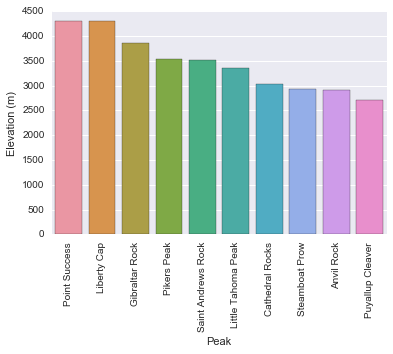

In [56]:
pipline = [
    {"$match": {"tags.natural": "peak"}},
    {"$project": {"_id": 0, "peak": "$tags.name", "elevation": "$tags.ele"}},
    {"$sort": {"elevation": -1}},
    {"$limit": 10}
]

c = db.nodes.aggregate(pipline)

df = pd.DataFrame(list(c))

ax = sns.barplot(data=df, x='peak', y='elevation')
ax.set_ylabel('Elevation (m)')
ax.set_xlabel('Peak')
plt.xticks(rotation=90)
plt.show()

### Number of bodies of water

In [71]:
pipline = [ {"$match": {"tags.natural": "water"}},
            {"$group": {"_id": "$tags.water", "count":{"$sum":1}}},
            {"$sort": {"count": -1}}
          ]

c = db.ways.aggregate(pipline)

pd.DataFrame(list(c))


,_id,count
0,None,511
1,lake,178
2,pond,9


### Top ten contributors

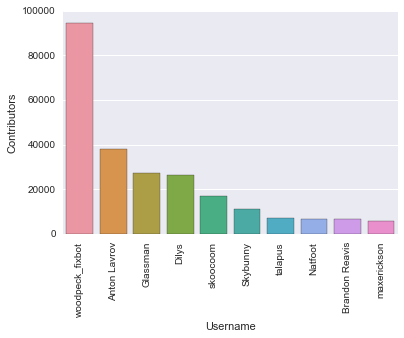

In [74]:
pipline = [ {"$group": {"_id": "$user", "count":{"$sum":1}}},
            {"$sort":{"count":-1}},
            {"$limit": 10}
          ]

results = db.nodes.aggregate(pipline)

df = pd.DataFrame(list(results))

ax = sns.barplot(data=df, x='_id', y='count')
ax.set_ylabel('Contributors')
ax.set_xlabel('Username')
plt.xticks(rotation=90)
plt.show()

### Count of natural nodes and ways

In [91]:
pipline = [ {"$match": {"tags.natural": {"$exists": True}}},
            {"$project": {"natural": "$tags.natural"}},
            {"$group": {"_id":"$natural", "count":{"$sum": 1} }},
            {"$sort": {"count": -1}}
           
          ]

c = db.nodes.aggregate(pipline)
pd.DataFrame(list(c))

,_id,count
0,peak,311
1,cliff,32
2,saddle,15
3,glacier,10
4,wetland,5
5,spring,3
6,rock,2
7,cave_entrance,2
8,bay,2
9,heath,2


In [89]:
pipline = [ {"$match": {"tags.natural": {"$exists": True}}},
            {"$project": {"natural": "$tags.natural"}},
            {"$group": {"_id":"$natural", "count":{"$sum": 1} }},
            {"$sort": {"count": -1}}
           
          ]

c = db.ways.aggregate(pipline)
pd.DataFrame(list(c))

,_id,count
0,water,698
1,wood,102
2,glacier,98
3,cliff,33
4,wetland,32
5,bare_rock,24
6,scree,9
7,ridge,2
8,spring,1
9,beach,1


### National parks and protected areas

In [110]:
pipline = [ {"$match": {"tags.boundary": {"$in":["national_park","protected_area"]}}},
            {"$project": {"_id": 0, "name": "$tags.name"}},
            {"$sort": {"name": 1}}
          ]

c = db.relations.aggregate(pipline)
pd.DataFrame(list(c))

,name
0,Ahtanum State Forest
1,Clearwater Wilderness Area
2,Conboy Lake National Wildlife Refuge
3,Gifford Pinchot National Forest
4,Glacier View Wilderness Area
5,Goat Rocks Wilderness Area
6,Indian Heaven Wilderness Area
7,Mount Adams Recreation Area
8,Mount Adams Wilderness Area
9,Mount Baker-Snoqualmie National Forest


### Camping

In [114]:
pipline = [ {"$match": {"tags.tourism": "camp_site", "tags.name":{"$exists": 1}}},
            {"$project": {"_id": 0, "name": "$tags.name"}},
            {"$sort": {"name": 1}}
          ]

c = db.nodes.aggregate(pipline)
pd.DataFrame(list(c))

,name
0,Hause Creek Campground
1,Adams Fork Campground
2,Big Creek Campground
3,Bird Lake Campground
4,Blue Lake Creek Camp Ground
5,Boulder Cave Sno-Park
6,Buck Creek Camp
7,Camp Hazard
8,Camp Muir
9,Camp Sheppard


## Other ideas about the dataset

For ways and relations, only the references to the nodes which have the coordinates.  For use in mapping applications and other calculations having these coordinates directly associated with the nodes and ways would be useful.

For ways, having a list of coordinates would allow for the calculation of the the distance of the path.  

For many natural features, knowing the elevation is useful.  An external serice can be used to retrieve elevation data for specific points.  Single points can be added directly to nodes.  For ways, specially hiking trails, using the starting and ending points the elevation gain/loss can be calculated.  A possible issue with how the "ways" are defined is that they are often broken up into sections, and have no larger "relation" to complete the route.  A single hiking trail may be represented as several indpendent ways.